In [111]:
import os
import sys

from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

from degpy.session import Session

sess_paths = {
    'ps_17' : '/Volumes/Backup Plus/data/080602/080602_ps17_160704/2016-07-04_13-22-47',
    'ps_19' : '/Volumes/Backup Plus/data/080602/080602_ps19_160706/2016-07-06_13-38-43',
}

%matplotlib inline

In [116]:
# get session object
ps_17 = Session(sess_paths['ps_17'])

# get terminal object from session object
lfp1 = ps_17.get_terminal('LFP1.ncs')

# compute session length (seconds)
sess_length = (lfp1.event_timestamps[-1] - lfp1.event_timestamps[0]) / 1e6

# get data
data = lfp1.get_dataframe()
time = np.linspace(0, sess_length, len(data))

In [121]:
# get terminal object from session object
lfp2 = ps_17.get_terminal('LFP2.ncs')

# compute session length (seconds)
sess_length2 = (lfp2.event_timestamps[-1] - lfp2.event_timestamps[0]) / 1e6

# get data
data2 = lfp2.get_dataframe()
time2 = np.linspace(0, sess_length, len(data))

In [124]:
data.head()

,timestamp,data,exposure,degu_id
0,8.192928e+08,19.531847,Starting Recording,080602
1,8.192933e+08,36.133916,Starting Recording,080602
2,8.192938e+08,32.776880,Starting Recording,080602
3,8.192943e+08,28.199104,Starting Recording,080602
4,8.192948e+08,29.175696,Starting Recording,080602


In [125]:
data2.head()

,timestamp,data,exposure,degu_id
0,8.192928e+08,19.531847,Starting Recording,080602
1,8.192933e+08,36.133916,Starting Recording,080602
2,8.192938e+08,32.776880,Starting Recording,080602
3,8.192943e+08,28.199104,Starting Recording,080602
4,8.192948e+08,29.175696,Starting Recording,080602


In [116]:
# Writing data to csv
# data.to_csv('080602-ps17-lfp1.csv')

In [11]:
data.exposure.unique()

array(['Starting Recording', 'r1s', 'r1e', 'b1s', 'b1e', 'b2s', 'b2e',
       'b3s', 's1', 's1o', 's2', 's2o', 'b3e', 'b4s', 'b4e', 'b5s', 'b5e',
       'b6s', 'b6e', 'b7s', 'o1', 'o1o', 'o2', 'o2o', 'b7e', 'b8s', 'b8e',
       'b9s', 'b9e', 'b10s', 'b10e', 'b11s', 'b11e', 'b12s', 'b12e',
       'r2s', 'r2e'], dtype=object)

In [18]:
test_label_cols = [lab[:-1] if lab[-1] not in '1234567890' else lab for lab in data.exposure.unique()]

In [43]:
data = data[data['exposure'] != 'Starting Recording']

In [82]:
data.exposure.unique()

array(['r1s', 'r1e', 'b1s', 'b1e', 'b2s', 'b2e', 'b3s', 's1', 's1o', 's2',
       's2o', 'b3e', 'b4s', 'b4e', 'b5s', 'b5e', 'b6s', 'b6e', 'b7s',
       'o1', 'o1o', 'o2', 'o2o', 'b7e', 'b8s', 'b8e', 'b9s', 'b9e',
       'b10s', 'b10e', 'b11s', 'b11e', 'b12s', 'b12e', 'r2s', 'r2e'],
      dtype=object)

In [103]:
labels = data.exposure

stack = []
encoded_labels = []
end_states = []

for lab in labels:
    if lab[-1] in '1234567890':
        lab += 'i'
    
        
    if lab[:-1] not in stack:
#         print(lab[:-1])
#         print(lab)
        if lab[-1] == 's' or lab[-1] == 'i':
            print('PUSH', lab[:-1], '... ', lab)
            stack.append(lab[:-1])
#             print('PUSH', stack)
     
    if lab[:-1] not in end_states:
        if lab[-1] == 'e' or lab[-1] == 'o':
            print('POP', lab[:-1], '... ', lab)
            end_states.append(lab[:-1])
            stack.pop()
#             print('POP', stack)
#     else:
#         raise ValueError
    encoded_labels.append("".join(stack))

PUSH r1 ...  r1s
POP r1 ...  r1e
PUSH b1 ...  b1s
POP b1 ...  b1e
PUSH b2 ...  b2s
POP b2 ...  b2e
PUSH b3 ...  b3s
PUSH s1 ...  s1i
POP s1 ...  s1o
PUSH s2 ...  s2i
POP s2 ...  s2o
POP b3 ...  b3e
PUSH b4 ...  b4s
PUSH s1 ...  s1i
PUSH s2 ...  s2i
POP b4 ...  b4e
PUSH b5 ...  b5s
PUSH s2 ...  s2i
POP b5 ...  b5e
PUSH b6 ...  b6s
PUSH s2 ...  s2i
POP b6 ...  b6e
PUSH b7 ...  b7s
PUSH o1 ...  o1i
POP o1 ...  o1o
PUSH o2 ...  o2i
POP o2 ...  o2o
POP b7 ...  b7e
PUSH b8 ...  b8s
PUSH o1 ...  o1i
PUSH o2 ...  o2i
POP b8 ...  b8e
PUSH b9 ...  b9s
PUSH o2 ...  o2i
POP b9 ...  b9e
PUSH b10 ...  b10s
PUSH o2 ...  o2i
POP b10 ...  b10e
PUSH b11 ...  b11s
POP b11 ...  b11e
PUSH b12 ...  b12s
POP b12 ...  b12e
PUSH r2 ...  r2s
POP r2 ...  r2e


In [101]:
stack

['b4', 's1', 'b5', 'b6', 'b8', 'o1', 'b9', 'b10']

In [92]:
lst = []
for lab in labels:
    if lab not in lst:
        lst.append(lab)

In [93]:
lst

['r1s',
 'r1e',
 'b1s',
 'b1e',
 'b2s',
 'b2e',
 'b3s',
 's1',
 's1o',
 's2',
 's2o',
 'b3e',
 'b4s',
 'b4e',
 'b5s',
 'b5e',
 'b6s',
 'b6e',
 'b7s',
 'o1',
 'o1o',
 'o2',
 'o2o',
 'b7e',
 'b8s',
 'b8e',
 'b9s',
 'b9e',
 'b10s',
 'b10e',
 'b11s',
 'b11e',
 'b12s',
 'b12e',
 'r2s',
 'r2e']

In [63]:
len(data[[]])

14852295

In [5]:
print('data size: {:.2f} GB'.format(sys.getsizeof(data) / 1e9))

data size: 2.54 GB


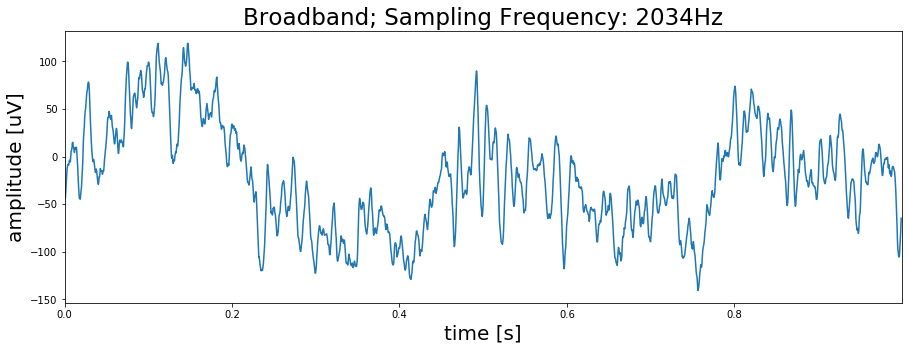

In [119]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(time[0:lfp1.sampling_rate], data['data'][0:lfp1.sampling_rate])
ax.set_title('Broadband; Sampling Frequency: {}Hz'.format(lfp1.sampling_rate), fontsize=23)
ax.set_xlim(0, time[lfp1.sampling_rate])
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('amplitude [uV]', fontsize=20)
plt.show()

In [120]:
def filter_data(data, low, high, sf, order=2):
    # Determine Nyquist frequency
    nyq = sf/2

    # Set bands
    low = low/nyq
    high = high/nyq

    # Calculate coefficients
    b, a = butter(order, [low, high], btype='band')

    # Filter signal
    filtered_data = lfilter(b, a, data)
    
    return filtered_data

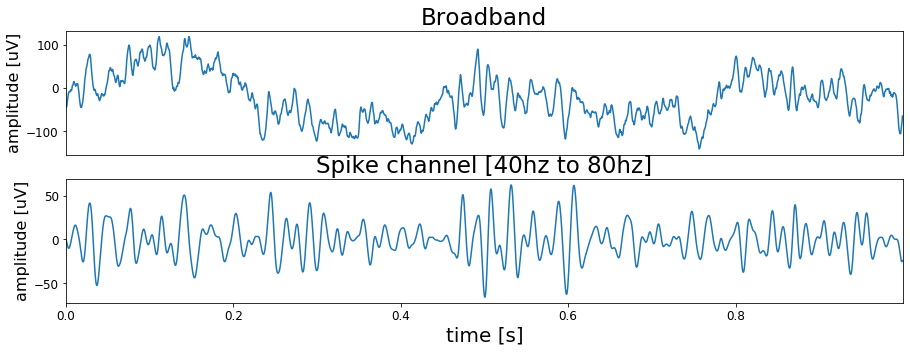

In [121]:
spike_data = filter_data(data['data'], low=30, high=80, sf=lfp1.sampling_rate)

# Plot signals
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
ax[0].plot(time[0:lfp1.sampling_rate], data['data'][0:lfp1.sampling_rate])
ax[0].set_xticks([])
ax[0].set_title('Broadband', fontsize=23)
ax[0].set_xlim(0, time[lfp1.sampling_rate])
ax[0].set_ylabel('amplitude [uV]', fontsize=16)
ax[0].tick_params(labelsize=12)

ax[1].plot(time[0:lfp1.sampling_rate], spike_data[0:lfp1.sampling_rate])
ax[1].set_title('Spike channel [40hz to 80hz]', fontsize=23)
ax[1].set_xlim(0, time[lfp1.sampling_rate])
ax[1].set_xlabel('time [s]', fontsize=20)
ax[1].set_ylabel('amplitude [uV]', fontsize=16)
ax[1].tick_params(labelsize=12)
plt.show()

In [111]:
def get_spikes(data, spike_window=80, tf=5, offset=10, max_thresh=350):
    
    # Calculate threshold based on data mean
    thresh = np.mean(np.abs(data)) *tf

    # Find positions wherere the threshold is crossed
    pos = np.where(data > thresh)[0] 
    pos = pos[pos > spike_window]

    # Extract potential spikes and align them to the maximum
    spike_samp = []
    wave_form = np.empty([1, spike_window*2])
    for i in pos:
        if i < data.shape[0] - (spike_window+1):
            # Data from position where threshold is crossed to end of window
            tmp_waveform = data[i:i+spike_window*2]
            
            # Check if data in window is below upper threshold (artifact rejection)
            if np.max(tmp_waveform) < max_thresh:
                # Find sample with maximum data point in window
                tmp_samp = np.argmax(tmp_waveform) +i
                
                # Re-center window on maximum sample and shift it by offset
                tmp_waveform = data[tmp_samp-(spike_window-offset):tmp_samp+(spike_window+offset)]

                # Append data
                spike_samp = np.append(spike_samp, tmp_samp)
                wave_form = np.append(wave_form, tmp_waveform.reshape(1, spike_window*2), axis=0)
    
    # Remove duplicates
    ind = np.where(np.diff(spike_samp) > 1)[0]
    spike_samp = spike_samp[ind]
    wave_form = wave_form[ind]
    
    return spike_samp, wave_form

In [181]:
data.head()

,timestamp,data,exposure,degu_id,fft
0,8.192928e+08,-41.261026,Starting Recording,080602,8.176606e+14
1,8.192933e+08,-44.373914,Starting Recording,080602,7.493325e+14
2,8.192938e+08,-43.763544,Starting Recording,080602,8.035134e+14
3,8.192943e+08,-35.889768,Starting Recording,080602,8.053632e+14
4,8.192948e+08,-26.612141,Starting Recording,080602,8.289846e+14


In [124]:
data.exposure.unique()

array(['Starting Recording', 'r1s', 'r1e', 'b1s', 'b1e', 'b2s', 'b2e',
       'b3s', 's1', 's1o', 's2', 's2o', 'b3e', 'b4s', 'b4e', 'b5s', 'b5e',
       'b6s', 'b6e', 'b7s', 'o1', 'o1o', 'o2', 'o2o', 'b7e', 'b8s', 'b8e',
       'b9s', 'b9e', 'b10s', 'b10e', 'b11s', 'b11e', 'b12s', 'b12e',
       'r2s', 'r2e'], dtype=object)

In [141]:
r1 = data.iloc[np.argmax((data.exposure == 'r1s').values):np.argmax((data.exposure == 'r1e').values), :]
b1 = data.iloc[np.argmax((data.exposure == 'b1s').values):np.argmax((data.exposure == 'b1e').values), :]
b2 = data.iloc[np.argmax((data.exposure == 'b2s').values):np.argmax((data.exposure == 'b2e').values), :]

# s1 and s2 happen within b3
b3 = data.iloc[np.argmax((data.exposure == 'b3s').values):np.argmax((data.exposure == 'b3e').values), :]
s1 = data.iloc[np.argmax((data.exposure == 's1').values):np.argmax((data.exposure == 's1o').values), :]
s2 = data.iloc[np.argmax((data.exposure == 's2').values):np.argmax((data.exposure == 's2o').values), :]

b4 = data.iloc[np.argmax((data.exposure == 'b4s').values):np.argmax((data.exposure == 'b4e').values), :]
b5 = data.iloc[np.argmax((data.exposure == 'b5s').values):np.argmax((data.exposure == 'b5e').values), :]
b6 = data.iloc[np.argmax((data.exposure == 'b6s').values):np.argmax((data.exposure == 'b6e').values), :]

# o1 and o2 happen within b7
b7 = data.iloc[np.argmax((data.exposure == 'b7s').values):np.argmax((data.exposure == 'b7e').values), :]
o1 = data.iloc[np.argmax((data.exposure == 'o1').values):np.argmax((data.exposure == 'o1o').values), :]
o2 = data.iloc[np.argmax((data.exposure == 'o2').values):np.argmax((data.exposure == 'o2o').values), :]

b8 = data.iloc[np.argmax((data.exposure == 'b8s').values):np.argmax((data.exposure == 'b8e').values), :]
b9 = data.iloc[np.argmax((data.exposure == 'b9s').values):np.argmax((data.exposure == 'b9e').values), :]
b10 = data.iloc[np.argmax((data.exposure == 'b10s').values):np.argmax((data.exposure == 'b10e').values), :]
b11 = data.iloc[np.argmax((data.exposure == 'b11s').values):np.argmax((data.exposure == 'b11e').values), :]
b12 = data.iloc[np.argmax((data.exposure == 'b12s').values):np.argmax((data.exposure == 'b12e').values), :]




## Rest Gamma Waveforms 

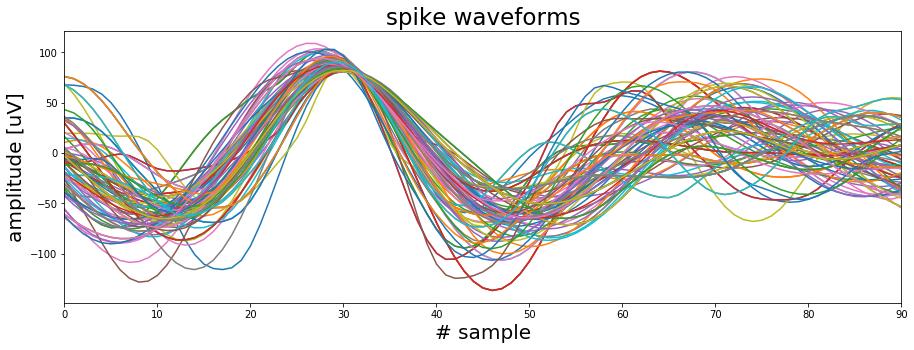

In [146]:
spike_data = filter_data(r1['data'], low=30, high=80, sf=lfp1.sampling_rate)

spike_samp, wave_form = get_spikes(spike_data, spike_window=50, tf=5, offset=20)

np.random.seed(10)
fig, ax = plt.subplots(figsize=(15, 5))

for i in range(100):
    spike = np.random.randint(0, wave_form.shape[0])
    ax.plot(wave_form[spike, :])

ax.set_xlim([0, 90])
ax.set_xlabel('# sample', fontsize=20)
ax.set_ylabel('amplitude [uV]', fontsize=20)
ax.set_title('spike waveforms', fontsize=23)
plt.show()

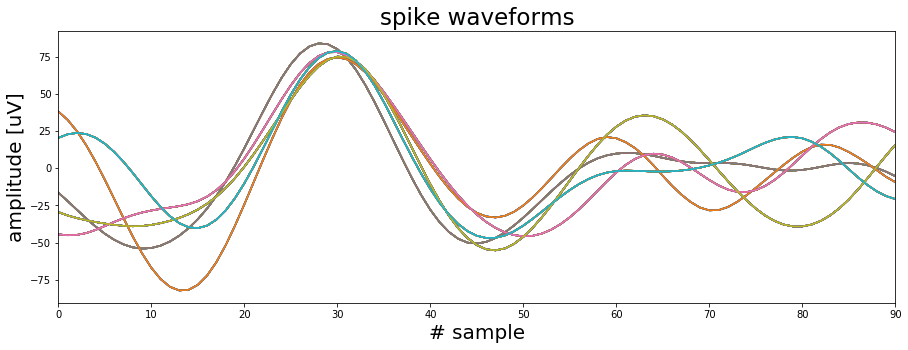

In [149]:
spike_data = filter_data(b1['data'], low=30, high=80, sf=lfp1.sampling_rate)

spike_samp, wave_form = get_spikes(spike_data, spike_window=50, tf=5, offset=20)

np.random.seed(10)
fig, ax = plt.subplots(figsize=(15, 5))

for i in range(100):
    spike = np.random.randint(0, wave_form.shape[0])
    ax.plot(wave_form[spike, :])

ax.set_xlim([0, 90])
ax.set_xlabel('# sample', fontsize=20)
ax.set_ylabel('amplitude [uV]', fontsize=20)
ax.set_title('spike waveforms', fontsize=23)
plt.show()

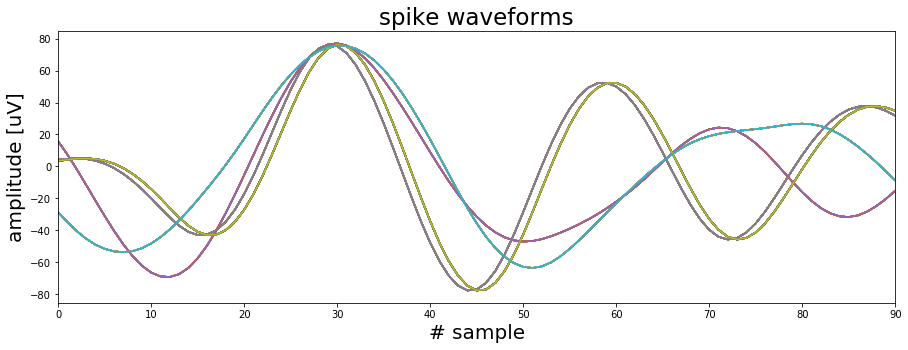

In [150]:
spike_data = filter_data(b2['data'], low=30, high=80, sf=lfp1.sampling_rate)

spike_samp, wave_form = get_spikes(spike_data, spike_window=50, tf=5, offset=20)

np.random.seed(10)
fig, ax = plt.subplots(figsize=(15, 5))

for i in range(100):
    spike = np.random.randint(0, wave_form.shape[0])
    ax.plot(wave_form[spike, :])

ax.set_xlim([0, 90])
ax.set_xlabel('# sample', fontsize=20)
ax.set_ylabel('amplitude [uV]', fontsize=20)
ax.set_title('spike waveforms', fontsize=23)
plt.show()

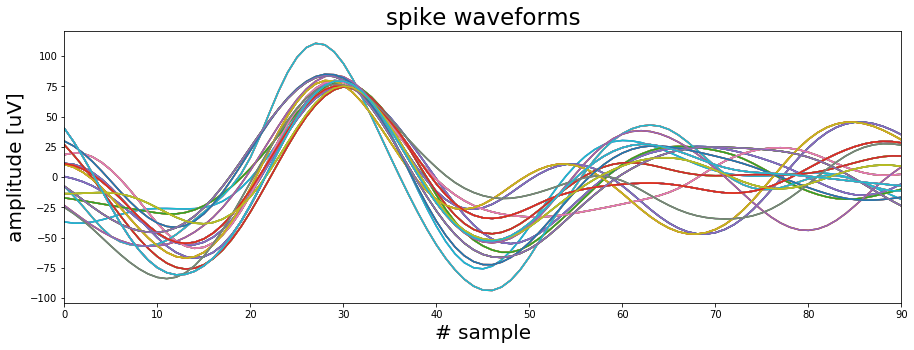

In [151]:
spike_data = filter_data(b3['data'], low=30, high=80, sf=lfp1.sampling_rate)

spike_samp, wave_form = get_spikes(spike_data, spike_window=50, tf=5, offset=20)

np.random.seed(10)
fig, ax = plt.subplots(figsize=(15, 5))

for i in range(100):
    spike = np.random.randint(0, wave_form.shape[0])
    ax.plot(wave_form[spike, :])

ax.set_xlim([0, 90])
ax.set_xlabel('# sample', fontsize=20)
ax.set_ylabel('amplitude [uV]', fontsize=20)
ax.set_title('spike waveforms', fontsize=23)
plt.show()

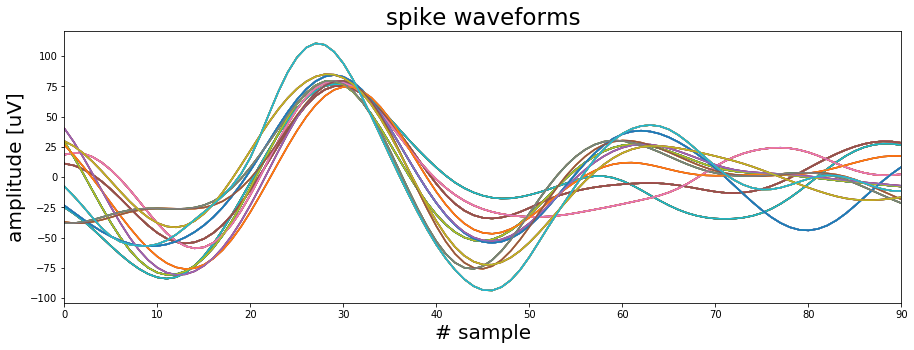

In [153]:
spike_data = filter_data(s1['data'], low=30, high=80, sf=lfp1.sampling_rate)

spike_samp, wave_form = get_spikes(spike_data, spike_window=50, tf=5, offset=20)

np.random.seed(10)
fig, ax = plt.subplots(figsize=(15, 5))

for i in range(100):
    spike = np.random.randint(0, wave_form.shape[0])
    ax.plot(wave_form[spike, :])

ax.set_xlim([0, 90])
ax.set_xlabel('# sample', fontsize=20)
ax.set_ylabel('amplitude [uV]', fontsize=20)
ax.set_title('spike waveforms', fontsize=23)
plt.show()

In [ ]:
spike_data = filter_data(s1['data'], low=30, high=80, sf=lfp1.sampling_rate)

spike_samp, wave_form = get_spikes(spike_data, spike_window=50, tf=5, offset=20)

np.random.seed(10)
fig, ax = plt.subplots(figsize=(15, 5))

for i in range(100):
    spike = np.random.randint(0, wave_form.shape[0])
    ax.plot(wave_form[spike, :])

ax.set_xlim([0, 90])
ax.set_xlabel('# sample', fontsize=20)
ax.set_ylabel('amplitude [uV]', fontsize=20)
ax.set_title('spike waveforms', fontsize=23)
plt.show()

## PCA 

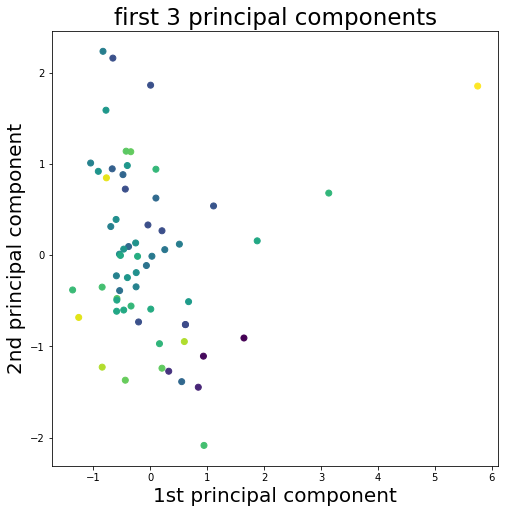

In [85]:
import sklearn as sk
from sklearn.decomposition import PCA

# Apply min-max scaling
scaler= sk.preprocessing.MinMaxScaler()
dataset_scaled = scaler.fit_transform(wave_form)

# Do PCA
pca = PCA(n_components=12)
pca_result = pca.fit_transform(dataset_scaled)

# Plot the 1st principal component aginst the 2nd and use the 3rd for color
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(pca_result[:, 0], pca_result[:, 1], c=pca_result[:, 2])
ax.set_xlabel('1st principal component', fontsize=20)
ax.set_ylabel('2nd principal component', fontsize=20)
ax.set_title('first 3 principal components', fontsize=23)

fig.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [94]:
def k_means(data, num_clus=3, steps=200):

    # Convert data to Numpy array
    cluster_data = np.array(data)
    
    # Initialize by randomly selecting points in the data
    center_init = np.random.randint(0, cluster_data.shape[0], num_clus)

    # Create a list with center coordinates
    center_init = cluster_data[center_init, :]

    # Repeat clustering  x times
    for _ in range(steps):

        # Calculate distance of each data point to cluster center
        distance = []
        for center in center_init:
            tmp_distance = np.sqrt(np.sum((cluster_data - center)**2, axis=1))
            
            # Adding smalle random noise to the data to avoid matching distances to centroids
            tmp_distance = tmp_distance + np.abs(np.random.randn(len(tmp_distance))*0.0001)
            distance.append(tmp_distance)

        # Assign each point to cluster based on minimum distance
        _, cluster = np.where(np.transpose(distance == np.min(distance, axis=0)))

        # Find center of mass for each cluster
        center_init = []
        for i in range(num_clus):    
            center_init.append(cluster_data[cluster == i, :].mean(axis=0).tolist())
            
    return cluster, center_init, distance

/Users/maxcopeland/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
/Users/maxcopeland/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/maxcopeland/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/maxcopeland/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


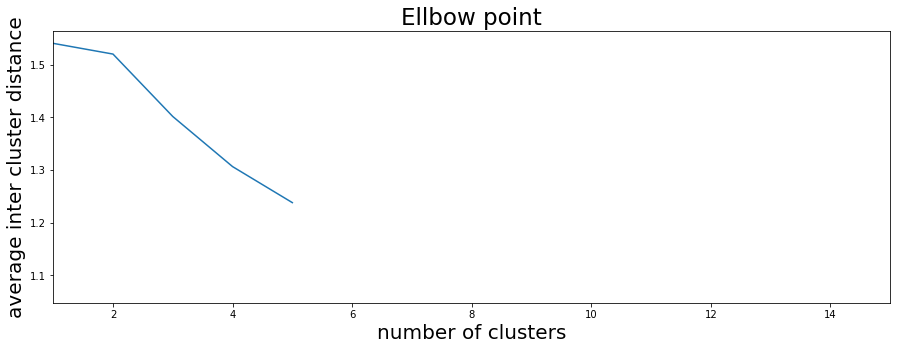

In [95]:
max_num_clusters = 15

average_distance = []
for run in range(20):
    tmp_average_distance = []
    for num_clus in range(1, max_num_clusters +1):
        cluster, centers, distance = k_means(pca_result, num_clus)
        tmp_average_distance.append(np.mean([np.mean(distance[x][cluster==x]) for x in range(num_clus)], axis=0))
    average_distance.append(tmp_average_distance)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(range(1, max_num_clusters +1), np.mean(average_distance, axis=0))
ax.set_xlim([1, max_num_clusters])
ax.set_xlabel('number of clusters', fontsize=20)
ax.set_ylabel('average inter cluster distance', fontsize=20)
ax.set_title('Ellbow point', fontsize=23)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 62

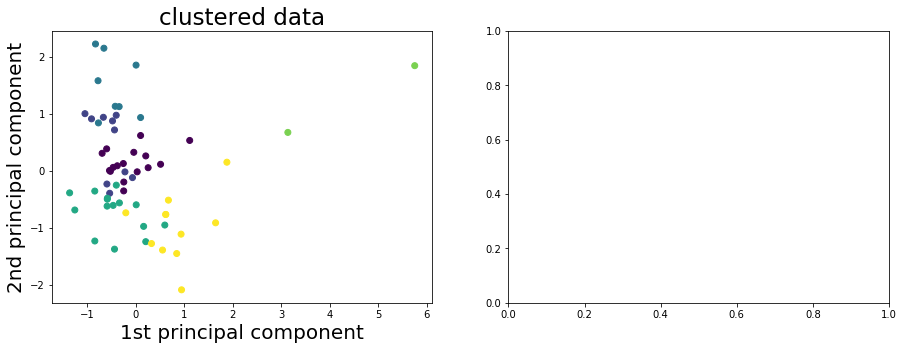

In [97]:
sf = lfp1.sampling_rate

num_clus = 6
cluster, centers, distance = k_means(pca_result, num_clus)

# Plot the result
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(pca_result[:, 0], pca_result[:, 1], c=cluster)
ax[0].set_xlabel('1st principal component', fontsize=20)
ax[0].set_ylabel('2nd principal component', fontsize=20)
ax[0].set_title('clustered data', fontsize=23)

time = np.linspace(0, wave_form.shape[1]/sf, wave_form.shape[1])*1000
for i in range(num_clus):
    cluster_mean = wave_form[cluster==i, :].mean(axis=0)
    cluster_std = wave_form[cluster==i, :].std(axis=0)
    
    ax[1].plot(time, cluster_mean, label='Cluster {}'.format(i))
    ax[1].fill_between(time, cluster_mean-cluster_std, cluster_mean+cluster_std, alpha=0.15)

ax[1].set_title('average waveforms', fontsize=23)
ax[1].set_xlim([0, time[-1]])
ax[1].set_xlabel('time [ms]', fontsize=20)
ax[1].set_ylabel('amplitude [uV]', fontsize=20)

plt.legend()
plt.show()

In [102]:
num_clus

6

In [98]:
combine_clusters = [0, 1, 3, 4]
combined_waveforms_mean = wave_form[[x in combine_clusters for x in cluster], :].mean(axis=0)
combined_waveforms_std = wave_form[[x in combine_clusters for x in cluster], :].std(axis=0)

cluster_0_waveform_mean = wave_form[cluster==2, :].mean(axis=0)
cluster_0_waveform_std = wave_form[cluster==2, :].std(axis=0)

cluster_1_waveform_mean = wave_form[cluster==5, :].mean(axis=0)
cluster_1_waveform_std = wave_form[cluster==5, :].std(axis=0)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(time, combined_waveforms_mean, label='Cluster 1')
ax.fill_between(time, combined_waveforms_mean-combined_waveforms_std, combined_waveforms_mean+combined_waveforms_std, 
                alpha=0.15)

ax.plot(time, cluster_0_waveform_mean, label='Cluster 2')
ax.fill_between(time, cluster_0_waveform_mean-cluster_0_waveform_std, cluster_0_waveform_mean+cluster_0_waveform_std, 
                alpha=0.15)

ax.plot(time, cluster_1_waveform_mean, label='Cluster 3')
ax.fill_between(time, cluster_1_waveform_mean-cluster_1_waveform_std, cluster_1_waveform_mean+cluster_1_waveform_std, 
                alpha=0.15)

ax.set_title('average waveforms', fontsize=23)
ax.set_xlim([0, time[-1]])
ax.set_xlabel('time [ms]', fontsize=20)
ax.set_ylabel('amplitude [uV]', fontsize=20)

plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 62

In [168]:
from scipy.signal import spectrogram, welch

In [171]:
fs = lfp1.sampling_rate

freqs, times, spectrogram = spectrogram(r1['data'])

In [179]:
f, Pxx_spec = welch(data['data'], fs)

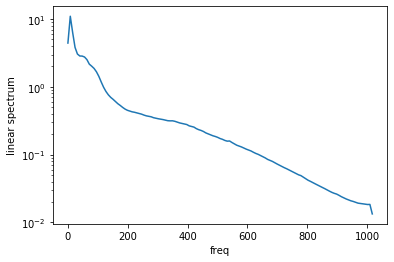

In [180]:
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('freq')
plt.ylabel('linear spectrum')
plt.show()